# Step 1: Library Installation & Downloads

Before starting the project, we need to **install** all the required **Python libraries** and **download necessary language models**.
- **`pandas`, `numpy`** → Used for **data handling** and performing **numeric operations**.

- **`matplotlib`, `seaborn`** → Used for **data visualization** like **charts** and **graphs**.

- **`spacy`, `textblob`** → Used for **Natural Language Processing (NLP)** tasks such as **lemmatization**, **stopword removal**, and **sentiment analysis**.

- **`scikit-learn`** → Used for **machine learning models**, **data splitting**, and **feature processing**.

- **`textblob.download_corpora`** → Downloads the required corpora so that **TextBlob** can calculate **polarity** and **sentiment scores**.

- **`spacy download en_core_web_sm`** → Downloads the **English language model** for spaCy, which is needed for **text cleaning**, especially **lemmatization** and **stop word removal**.

In [20]:
!pip install pandas numpy matplotlib seaborn spacy textblob scikit-learn
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm


Finished.

[nltk_data] Downloading package brown to C:\Users\HS
[nltk_data]     TRADER\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\HS
[nltk_data]     TRADER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HS
[nltk_data]     TRADER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HS TRADER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\HS
[nltk_data]     TRADER\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\HS
[nltk_data]     TRADER\AppData\Roaming\nltk_data...
[nltk_data]   Pack


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.6 MB/s eta 0:00:08
     -- ------------------------------------- 0.8/12.8 MB 1.5 MB/s eta 0:00:09
     --- ------------------------------------ 1.0/12.8 MB 1.4 MB/s eta 0:00:09
     ---- ----------------------------------- 1.3/12.8 MB 1.3 MB/s eta 0:00:10
     ---- ----------------------------------- 1.3/12.8 MB 1.3 MB/s eta 0:00:10
     ---- ----------------------------------- 1.6/12.8 MB 1.2 MB/s eta 0:00:10
     ----- ---------------------------------- 1.8/12.8 MB 1.2 MB/s eta 0:00:09
     ------ --------------------------------- 2.1/12.8 MB 1.2 MB/s eta 0:00:09
     -------- ------------------------------- 2.6/12.8 MB 1.3 MB/s eta 0:00:09
     -------- ------------------------------- 2.6/12.8 MB 1.3 MB/s eta 0:00:09
     --------- ------------------------------ 2.9/12.8 MB 1.2 MB/

##  Step 2: Load the Dataset

In this step, we **imported the dataset** and selected only the important columns we need for our sentiment analysis.


In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\HS TRADER\Documents\Tweets.csv")
df = df[['text', 'airline_sentiment']]
print(df.head())


                                                text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative


In [ ]:
import re
import spacy


try:
    nlp = spacy.load("en_core_web_sm")
except:
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")


def clean_text(text):
    text = str(text).lower()                          # Lowercase
    text = re.sub(r'http\S+|www\S+', '', text)        # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)             # Remove mentions & hashtags
    text = re.sub(r'[^a-z\s]', '', text)              # Remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()          # Remove extra spaces
    return text


df['clean_text'] = df['text'].apply(clean_text)


def lemmatize(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])


df['clean_text'] = df['clean_text'].apply(lemmatize)


print("\n✅ Cleaning Completed! Sample Data:")
print(df[['text', 'clean_text']].head())

 ## Step 3: Feature Extraction from Tweets

In this step, we extracted different **textual features** from the tweets to help the machine learning model understand and classify the sentiments better.

We used the following **manual features**:

- **Word Count**: Total number of words in each tweet.
- **Character Count**: Total number of characters in each tweet.
- **Average Word Length**: The average length of all words in a tweet.
- **Exclamation Count (`!`)**: Number of exclamation marks in the original text.
- **Question Mark Count (`?`)**: Number of question marks in the original text.
- **Has Hashtag**: Whether the tweet contains a **hashtag (`#`)** or not (1 = yes, 0 = no).
- **Has Mention**: Whether the tweet contains a **mention (`@`)** or not (1 = yes, 0 = no).
- **Polarity Score**: The **sentiment score** (ranging from -1 to +1) calculated using **TextBlob**.
  - Negative score → Negative sentiment
  - Zero → Neutral sentiment
  - Positive score → Positive sentiment.


In [33]:
import numpy as np
from textblob import TextBlob


In [77]:

df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))


print(df[['clean_text', 'word_count']].head())


                                          clean_text  word_count
0                                                say           1
1            plus ve add commercial experience tacky           6
2                           not today mean need trip           5
3  aggressive blast obnoxious entertainment guest...           9
4                                      big bad thing           3


In [78]:

df['char_count'] = df['clean_text'].apply(lambda x: len(x.replace(" ", "")))

print(df[['clean_text', 'char_count']].head())


                                          clean_text  char_count
0                                                say           3
1            plus ve add commercial experience tacky          34
2                           not today mean need trip          20
3  aggressive blast obnoxious entertainment guest...          63
4                                      big bad thing          11


In [79]:

df['avg_word_len'] = df['clean_text'].apply(
    lambda x: np.mean([len(w) for w in x.split()]) if x else 0
)

print(df[['clean_text', 'avg_word_len']].head())


                                          clean_text  avg_word_len
0                                                say      3.000000
1            plus ve add commercial experience tacky      5.666667
2                           not today mean need trip      4.000000
3  aggressive blast obnoxious entertainment guest...      7.000000
4                                      big bad thing      3.666667


In [80]:

df['exclam_count'] = df['text'].apply(lambda x: x.count('!'))
df['question_count'] = df['text'].apply(lambda x: x.count('?'))

print(df[['text', 'exclam_count', 'question_count']].head())


                                                text  exclam_count  \
0                @VirginAmerica What @dhepburn said.             0   
1  @VirginAmerica plus you've added commercials t...             0   
2  @VirginAmerica I didn't today... Must mean I n...             1   
3  @VirginAmerica it's really aggressive to blast...             0   
4  @VirginAmerica and it's a really big bad thing...             0   

   question_count  
0               0  
1               0  
2               0  
3               0  
4               0  


In [81]:

df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0)
df['has_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)

print(df[['text', 'has_hashtag', 'has_mention']].head())


                                                text  has_hashtag  has_mention
0                @VirginAmerica What @dhepburn said.            0            1
1  @VirginAmerica plus you've added commercials t...            0            1
2  @VirginAmerica I didn't today... Must mean I n...            0            1
3  @VirginAmerica it's really aggressive to blast...            0            1
4  @VirginAmerica and it's a really big bad thing...            0            1


In [86]:

df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

print(df[['clean_text', 'polarity']].head())


                                          clean_text  polarity
0                                                say    0.0000
1            plus ve add commercial experience tacky    0.0000
2                           not today mean need trip   -0.3125
3  aggressive blast obnoxious entertainment guest...   -0.1875
4                                      big bad thing   -0.3500


In [85]:
df[['clean_text', 'word_count', 'char_count', 'avg_word_len',
    'exclam_count', 'question_count', 'has_hashtag', 'has_mention', 'polarity']].head()


,clean_text,word_count,char_count,avg_word_len,exclam_count,question_count,has_hashtag,has_mention,polarity
0,say,1,3,3.000000,0,0,0,1,0.0000
1,plus ve add commercial experience tacky,6,34,5.666667,0,0,0,1,0.0000
2,not today mean need trip,5,20,4.000000,1,0,0,1,-0.3125
3,aggressive blast obnoxious entertainment guest...,9,63,7.000000,0,0,0,1,-0.1875
4,big bad thing,3,11,3.666667,0,0,0,1,-0.3500


## Step 4: TF-IDF Vectorization
In this step, we converted the **cleaned text** into **numerical values** using **TF-IDF (Term Frequency-Inverse Document Frequency)**.

TF-IDF helps the model understand **which words are more important** in each tweet by checking:
- How **frequently** a word appears in a tweet (**term frequency**)
- And how **rare** that word is across all tweets (**inverse document frequency**)



1. **Import TF-IDF Vectorizer**:
   We used `TfidfVectorizer` from `sklearn.feature_extraction.text`.

2. **Create the TF-IDF matrix**:
   We applied the vectorizer to the `clean_text` column to convert text into numbers.

3. **Limit features**:
   We limited the number of features using `max_features=1000` to keep the data small and fast.

4. **Convert to DataFrame**:
   We converted the TF-IDF matrix into a Pandas DataFrame so we can easily combine it with our manual features.

5. **Final Feature Set**:
   We combined the TF-IDF features with our **manual features** (like word count, polarity, etc.) to build the final dataset used for training.


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [42]:
tfidf = TfidfVectorizer(max_features=1000)  # top 1000 important words


In [43]:
X_tfidf = tfidf.fit_transform(df['clean_text'])


In [44]:
# TF-IDF results as DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Show sample
print(tfidf_df.head())


    aa  able  absolute  absolutely  accept  acceptable  access  accommodate  \
0  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   
1  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   
2  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   
3  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   
4  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   

   account  act  ...  wtf  yeah  year  yep  yes  yesterday   yo  you   yr  \
0      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   
1      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   
2      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   
3      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   
4      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   

   zero  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[

## Step 5: Visualize Sentiment Distribution
In this step, we used different **graphs** to understand our data better.

- **Sentiment Count Plot**: Kitne tweets positive, negative ya neutral hain.
- **Word Count vs Sentiment**: Kis sentiment wale tweets mein zyada words hain.
- **Character Count vs Sentiment**: Tweet ki length aur sentiment ka relation.
- **Polarity Scores**: Positive ya negative score ka distribution.
- **Avg. Word Length**: Long ya short words ka sentiment ke sath relation.

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


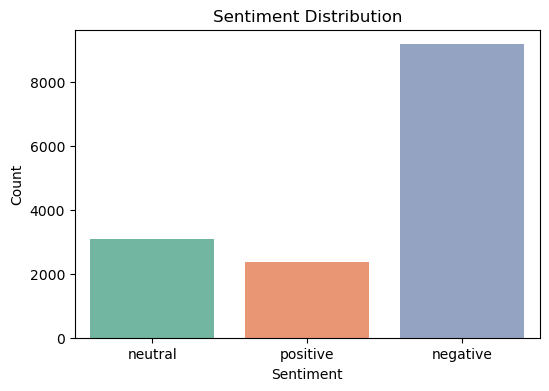

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='airline_sentiment', hue='airline_sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


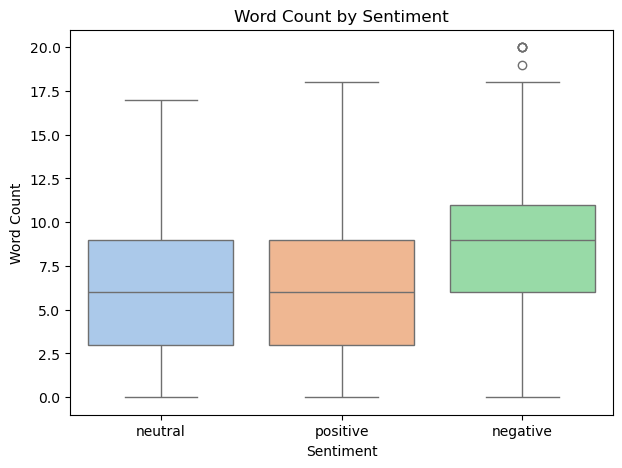

In [48]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='airline_sentiment', y='word_count', hue='airline_sentiment', palette='pastel', legend=False)
plt.title('Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()


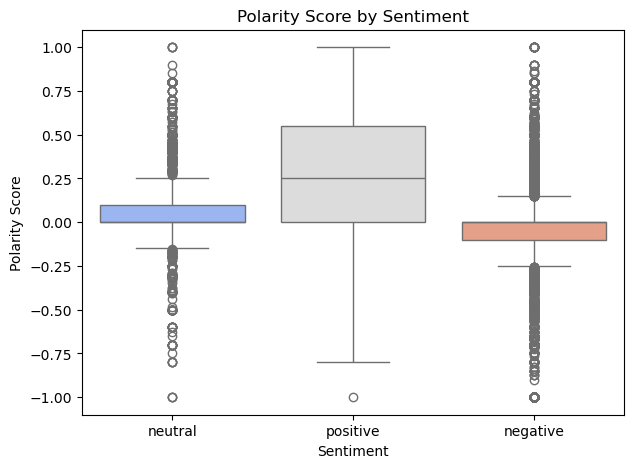

In [51]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='airline_sentiment', y='polarity', hue='airline_sentiment', palette='coolwarm', legend=False)
plt.title('Polarity Score by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Polarity Score')
plt.show()


In [52]:
# See which features are higher for which sentiment
print(df.groupby('airline_sentiment')[['word_count', 'char_count', 'avg_word_len', 'polarity']].mean())


                   word_count  char_count  avg_word_len  polarity
airline_sentiment                                                
negative             8.507082   44.174003      5.215698 -0.023882
neutral              6.067118   31.469829      5.089472  0.081685
positive             6.228523   32.203978      5.130583  0.287693


## Step 6: TF-IDF Feature Extraction
In this step, we **combined** our **manual features** (like word count, polarity, etc.) with the **TF-IDF features**.

1. Selected useful **manual features**:
   - `word_count`, `char_count`, `avg_word_len`, `polarity`, `has_hashtag`, etc.
2. Transformed the text into **TF-IDF vectors** using `TfidfVectorizer`.
3. Used `hstack` to **merge** manual features and TF-IDF features into one final set.

 This combination gives the model both **numerical** and **text-based** information, which helps improve **accuracy**.

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features=1000)  # max 1000 important words


X_tfidf = tfidf.fit_transform(df['clean_text'])


tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


print("\n✅ TF-IDF Feature Matrix Sample:")
print(tfidf_df.head())



✅ TF-IDF Feature Matrix Sample:
    aa  able  absolute  absolutely  accept  acceptable  access  accommodate  \
0  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   
1  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   
2  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   
3  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   
4  0.0   0.0       0.0         0.0     0.0         0.0     0.0          0.0   

   account  act  ...  wtf  yeah  year  yep  yes  yesterday   yo  you   yr  \
0      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   
1      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   
2      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   
3      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   
4      0.0  0.0  ...  0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  0.0   

   zero  
0   0.0  
1   0.0  

In [54]:
print("TF-IDF Shape:", tfidf_df.shape)



TF-IDF Shape: (14640, 1000)


## Step 7: Sentiment Classification & Analysis
In this step, we **trained** a machine learning model to **predict sentiment** (positive, negative, or neutral) based on the features we created.


1. **Split** the dataset:
   - Divided data into **training** and **testing** sets using `train_test_split`.

2. **Trained** the model:
   - Used **Logistic Regression** to learn patterns from the training data.

3. **Made predictions**:
   - Used the trained model to predict sentiment on the test data.

4. **Evaluated performance** using:
   - **Accuracy score**
   - **Confusion matrix**
   - **Classification report** (with precision, recall, and F1-score)

 This helps us understand **how well** the model is performing on each sentiment class.

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=300)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())


manual_features = df[['word_count', 'char_count', 'avg_word_len', 'exclam_count',
                      'question_count', 'has_hashtag', 'has_mention', 'polarity']].reset_index(drop=True)


final_features = pd.concat([tfidf_df, manual_features], axis=1)


In [57]:
from sklearn.model_selection import train_test_split

X = final_features
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7790300546448088

Confusion Matrix:
 [[1696  143   50]
 [ 250  282   48]
 [ 101   55  303]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.90      0.86      1889
     neutral       0.59      0.49      0.53       580
    positive       0.76      0.66      0.70       459

    accuracy                           0.78      2928
   macro avg       0.72      0.68      0.70      2928
weighted avg       0.77      0.78      0.77      2928



# Confusion Matrix Description

A **confusion matrix** was used to **analyze** the prediction performance of the model for each **sentiment class** (positive, negative, neutral).  
It helps in understanding how well the model is performing by showing the **correct** and **incorrect predictions** for each class.


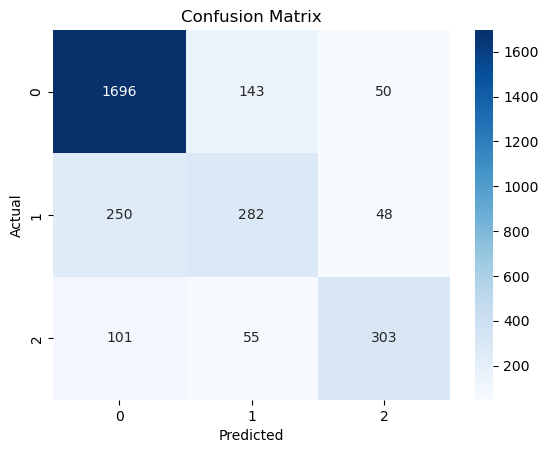

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
